In [1]:
import pandas as pd
import glob
from random import randrange

In [4]:
def bootstrap(x, y, delta, B):

    T = len(x)   
    count = 0
    
    # Passo 0
    corr = x.corr(y, method = 'pearson')
    
    correlations = []
    
    # Passo 8
    for k in range(B):

        print(f'{k+1}/{B}', end='\r')
        
        x_ = pd.Series()
        y_ = pd.Series()

        # Passo 3
        while len(x_) < T:
            # Passo 1
            i = randrange(T - delta)

            # Passo 2
            bloco = x[i : i + delta]
            x_ = pd.concat([x_, bloco])

        # Passo 6
        while len(y_) < T:
            # Passo 4
            j = randrange(T - delta)

            # Passo 5
            bloco = y[j : j + delta]
            y_ = pd.concat([y_, bloco])

        # Passo 7
        corr_ = x_.corr(y_, method = 'pearson')

        correlations = correlations + [corr_]
    
    return [corr, correlations]

In [17]:
ts = pd.read_csv('../Data/Processed/6.csv')

In [18]:
boot = bootstrap(ts.RR_E, ts.RR_F, 10, 1000)

<ipython-input-4-5156c58d1343>:16: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  x_ = pd.Series()
<ipython-input-4-5156c58d1343>:17: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  y_ = pd.Series()


<AxesSubplot:>

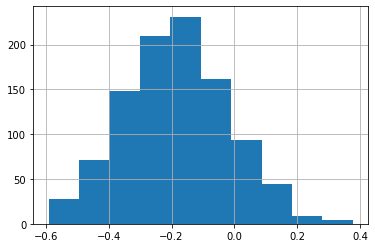

In [19]:
pd.Series(boot[1]).hist()